In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('storage/dataset.csv')

In [25]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

ValueError: could not convert string to float: 'M'

In [11]:
type(scaled_df)

numpy.ndarray

In [12]:
scaled_df_new = pd.DataFrame(scaled_df, columns=df.columns.to_list())

In [13]:
scaled_df_new

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1.0,0.496241,0.509091,0.36,0.294481,0.275429,0.226394,0.284324,0.518519
1,1.0,0.338346,0.327273,0.34,0.117381,0.117569,0.106940,0.122162,0.222222
2,0.0,0.609023,0.609091,0.52,0.396211,0.317041,0.318544,0.404324,0.296296
3,1.0,0.473684,0.509091,0.48,0.295717,0.264201,0.255973,0.295135,0.333333
4,0.5,0.308271,0.309091,0.30,0.104201,0.105020,0.086462,0.094054,0.222222
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.661654,0.663636,0.64,0.530890,0.461030,0.540387,0.477838,0.370370
4173,1.0,0.699248,0.645455,0.52,0.581137,0.549538,0.484642,0.500541,0.333333
4174,1.0,0.714286,0.709091,0.80,0.711285,0.656539,0.649602,0.594595,0.296296
4175,0.0,0.751880,0.727273,0.58,0.663097,0.663804,0.589306,0.572973,0.333333


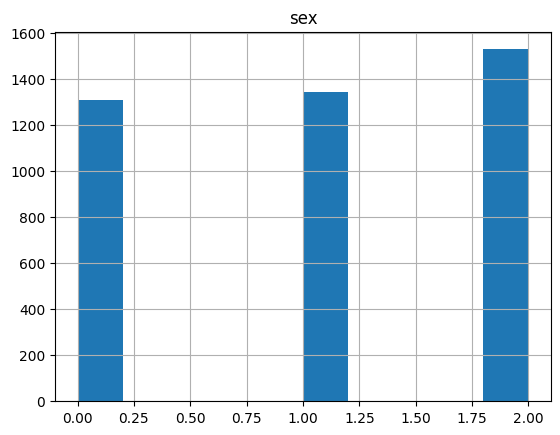

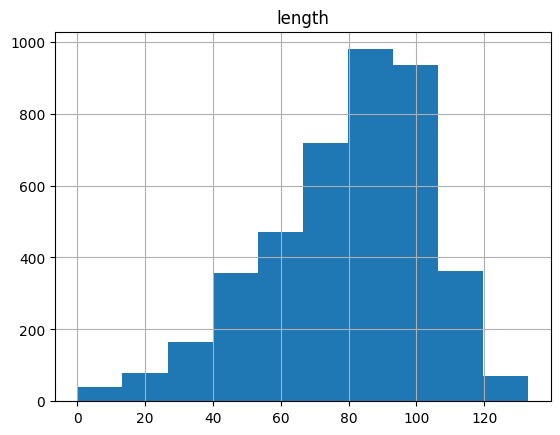

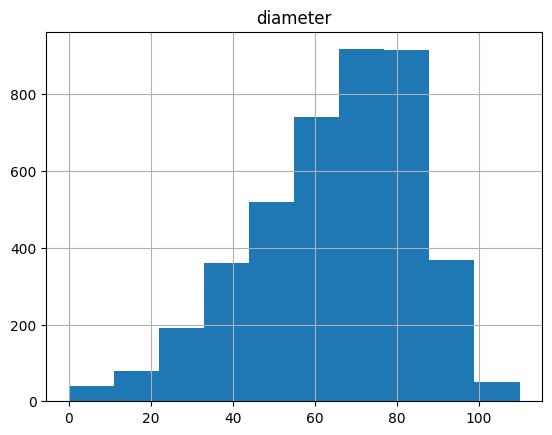

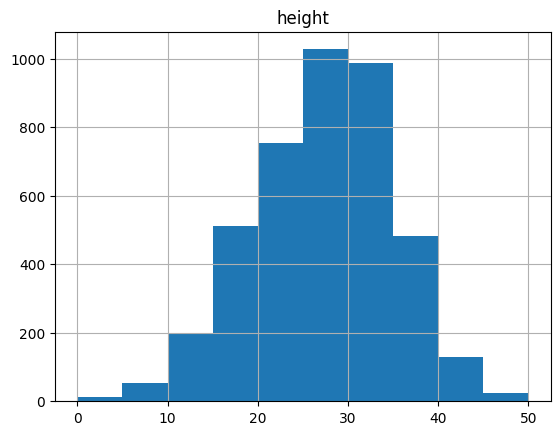

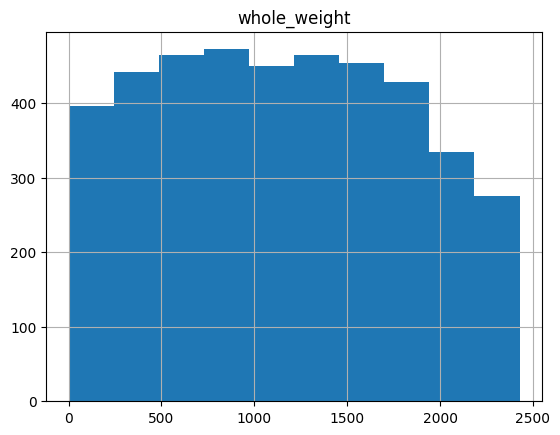

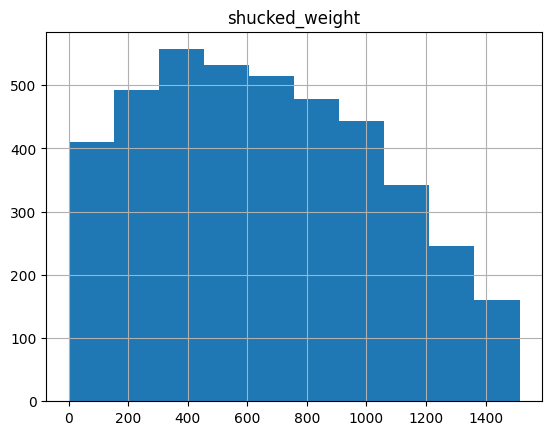

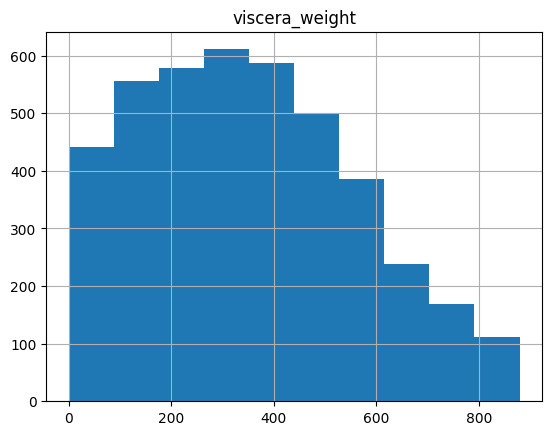

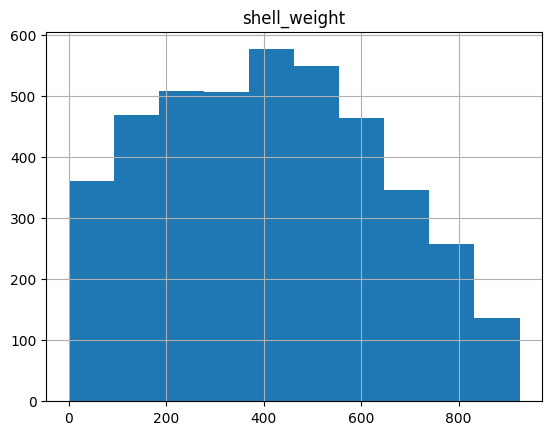

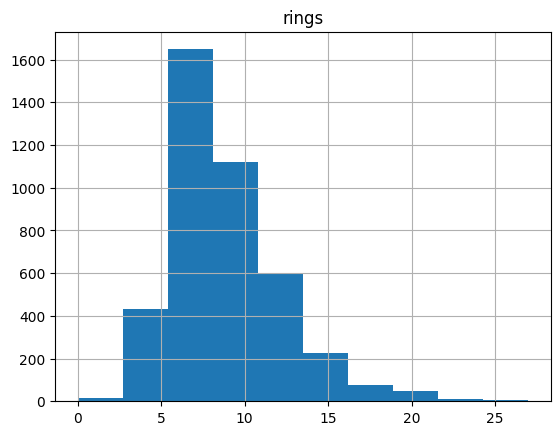

In [16]:
import matplotlib
for each_col in df.columns.to_list():
    df.hist(column=each_col)

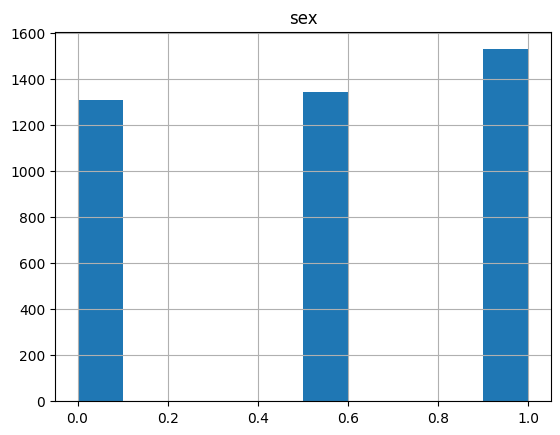

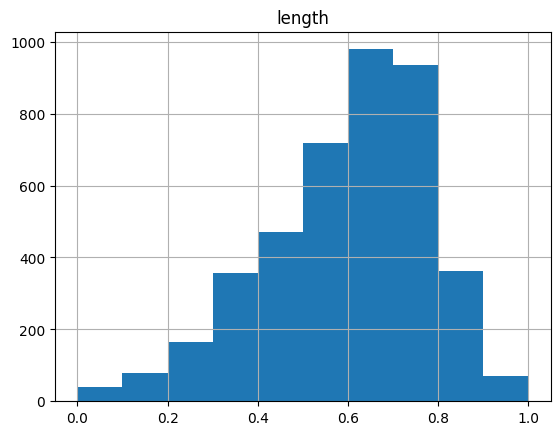

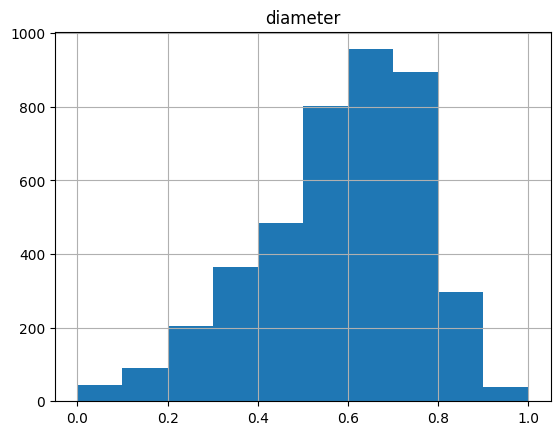

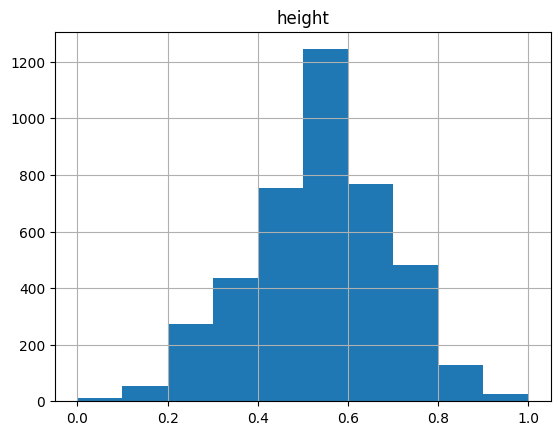

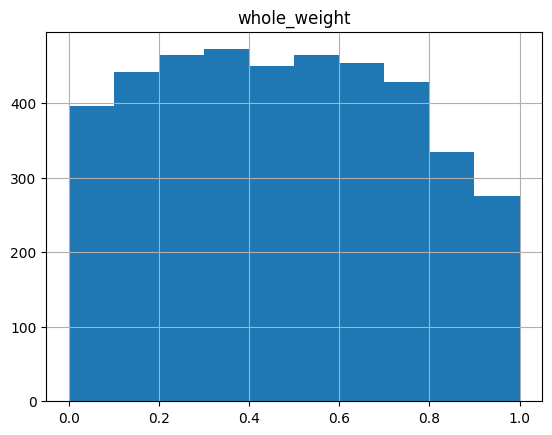

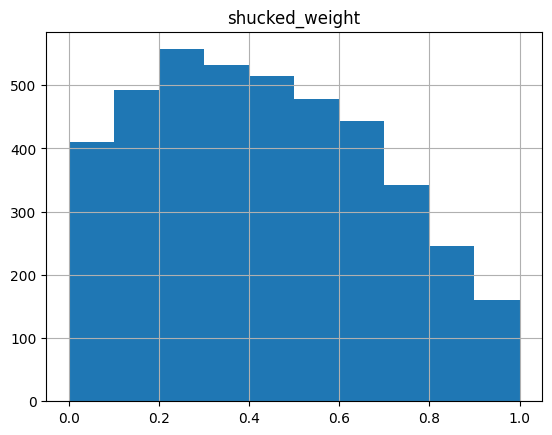

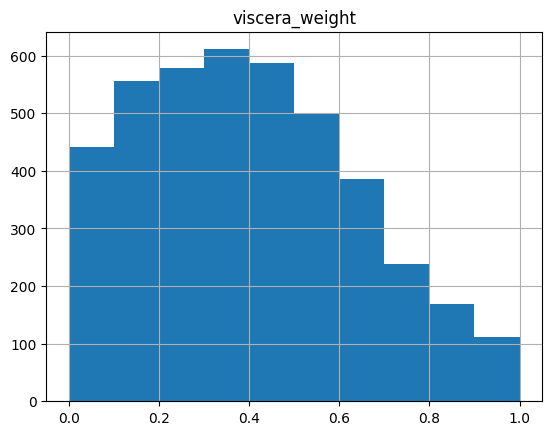

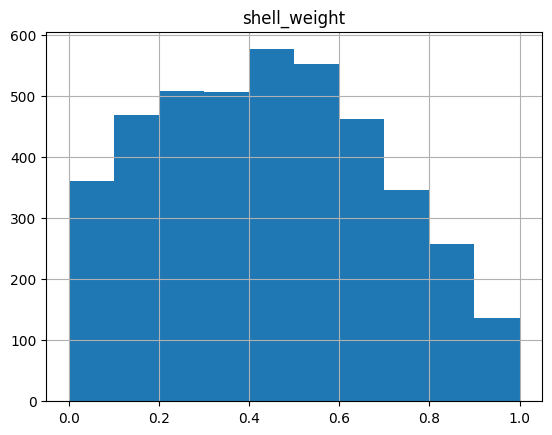

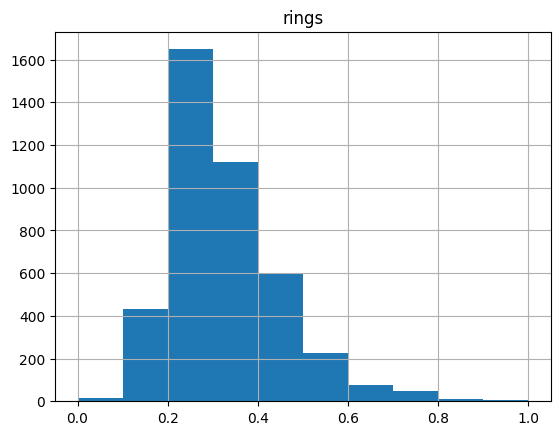

In [17]:
for each_col in scaled_df_new.columns:
    scaled_df_new.hist(column=each_col)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_std = ss.fit_transform(df)

In [20]:
scaled_std_df = pd.DataFrame(scaled_std, columns=df.columns.to_list())

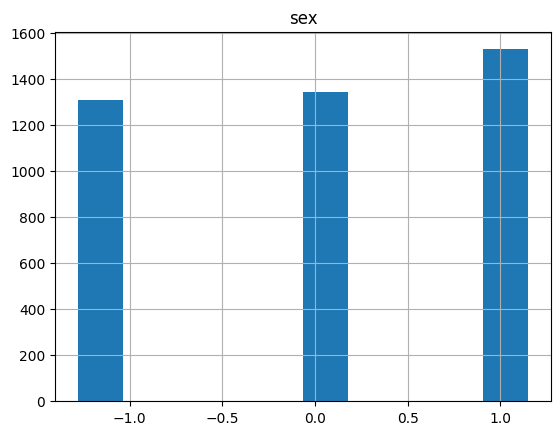

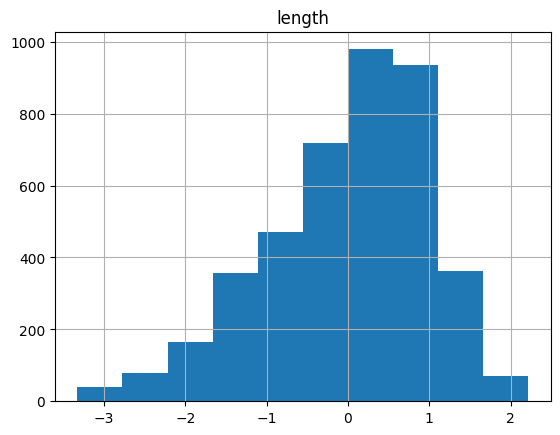

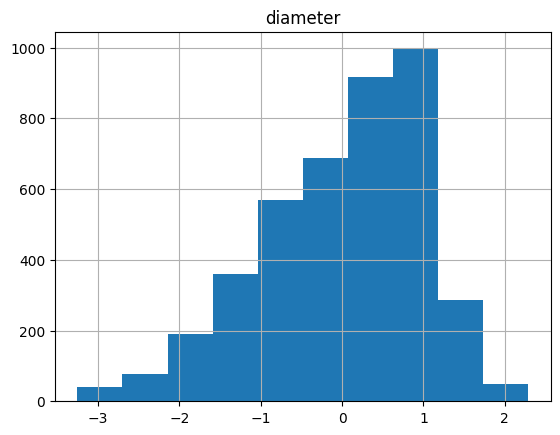

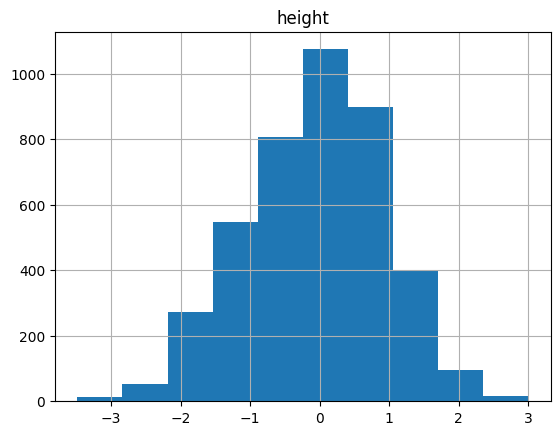

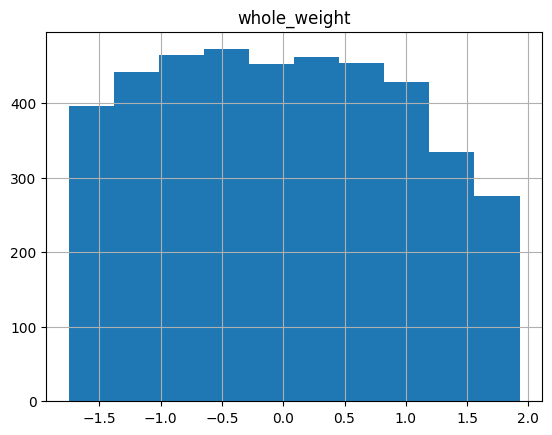

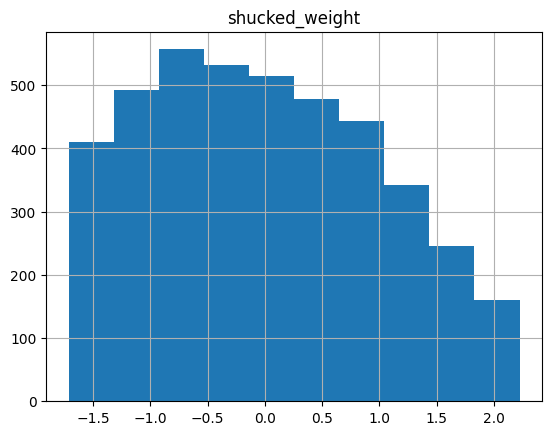

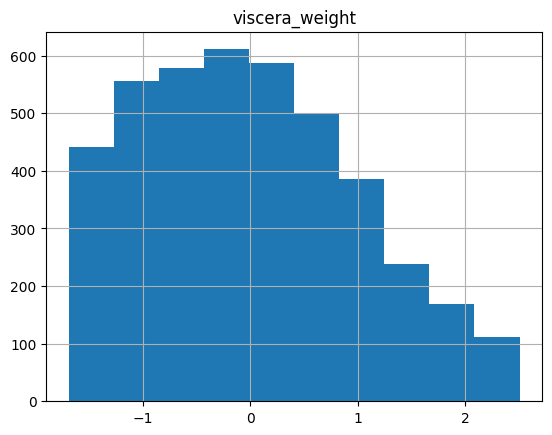

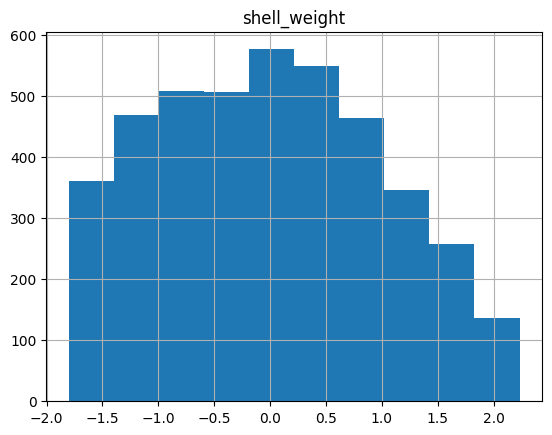

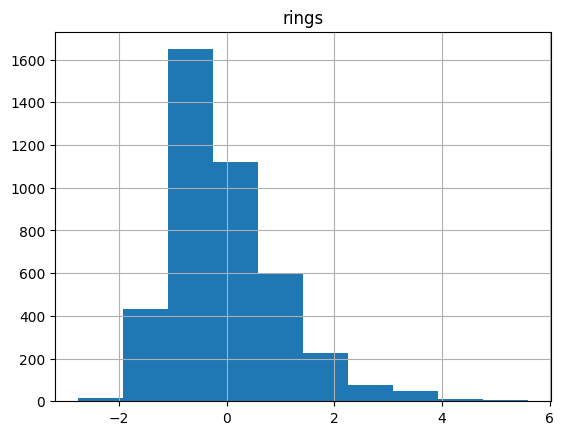

In [22]:
for each_col in scaled_std_df.columns:
    scaled_std_df.hist(column=each_col)

In [29]:
from sklearn.preprocessing import OneHotEncoder
 

In [35]:
df.sex.head()

0    M
1    M
2    F
3    M
4    I
Name: sex, dtype: object

In [66]:
enc = OneHotEncoder()
encoded_sex = enc.fit_transform(df[['sex']]).toarray()

In [67]:
print(encoded_sex)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [44]:
type(df['sex'])

pandas.core.series.Series

In [59]:
print(df.sex)

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: sex, Length: 4177, dtype: object


In [60]:
print(df[['sex']])

     sex
0      M
1      M
2      F
3      M
4      I
...   ..
4172   F
4173   M
4174   M
4175   F
4176   M

[4177 rows x 1 columns]


In [61]:
enc.get_feature_names()

c:\Users\salau\anaconda3\envs\ml_pipe\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_F', 'x0_I', 'x0_M'], dtype=object)

In [68]:
sex_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names())

c:\Users\salau\anaconda3\envs\ml_pipe\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
sex_df.head()

,x0_F,x0_I,x0_M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [70]:
new_df = df.join(sex_df)

In [73]:
new_df = new_df.drop(columns=['sex'])

In [75]:
new_df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,x0_F,x0_I,x0_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


In [79]:
scaled_df = pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)

In [80]:
scaled_df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,x0_F,x0_I,x0_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286,0.0,1.0,0.0


In [81]:
from sklearn.model_selection import train_test_split
X = scaled_df.iloc[:,0:-1]
y = scaled_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [82]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree.score(X_test, y_test)

1.0

In [83]:
scaled_df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,x0_F,x0_I,x0_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143,1.0,0.0,0.0
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429,0.0,0.0,1.0
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714,0.0,0.0,1.0
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429,1.0,0.0,0.0


In [89]:
df = pd.read_csv('storage/dataset.csv')

In [90]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [86]:
Y = df[['rings']]

In [93]:
df = df.drop(columns=['rings'])

In [92]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [94]:
encode = enc.fit_transform(df[['sex']]).toarray()
encode_df = pd.DataFrame(encode, columns=enc.get_feature_names())

c:\Users\salau\anaconda3\envs\ml_pipe\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
new_df = df.join(encode_df)

In [97]:
new_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0


KeyError: "['sex'] not found in axis"

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df, Y, test_size=0.30, random_state=42
)

In [109]:
X_train.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
2830,0.525,0.430,0.135,0.8435,0.4325,0.1800,0.1815,1.0,0.0,0.0
925,0.430,0.325,0.100,0.3645,0.1575,0.0825,0.1050,0.0,1.0,0.0
3845,0.455,0.350,0.105,0.4160,0.1625,0.0970,0.1450,0.0,0.0,1.0
547,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,0.0,0.0,1.0
2259,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950,1.0,0.0,0.0


In [123]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(dt.score(X_test, y_test))


def do_train(original_df, Y, model):

    X_train, X_test, y_train, y_test = train_test_split(
    original_df, Y, test_size=0.30, random_state=42)
    
    model.fit(X_train, y_train)

    scr = model.score(X_test, y_test)
    print(scr)
    return scr


0.19617224880382775


In [112]:
new_df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0


In [115]:
new_df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0


In [116]:
df_scaled = new_df.copy()

In [117]:
sc = scaler.fit_transform(df_scaled)

In [120]:
normal_df = pd.DataFrame(sc, columns=new_df.columns)

In [121]:
normal_df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0


In [124]:
do_train(normal_df, Y, tree.DecisionTreeClassifier())


0.21770334928229665


0.21770334928229665

In [126]:
from sklearn.svm import SVC
do_train(normal_df, Y, SVC())

c:\Users\salau\anaconda3\envs\ml_pipe\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2807017543859649


0.2807017543859649

In [127]:
normal_df.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.309666,-0.551465,0.236543
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.318626,-0.564315,0.240376
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.298421,-0.518552,0.215459
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.299741,-0.557592,0.252038
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.263991,-0.521842,0.251793
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.308444,-0.556081,0.242194
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.306319,-0.546953,0.235391
x0_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,1.000000,-0.464298,-0.512528
x0_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.464298,1.000000,-0.522541
x0_M,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,-0.512528,-0.522541,1.000000


In [130]:
normal_df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,x0_F,x0_I,x0_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
